In [64]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from utils import *
from wls import *
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets

<class 'numpy.ndarray'>
Image shape: (300, 400)
Data type: float64


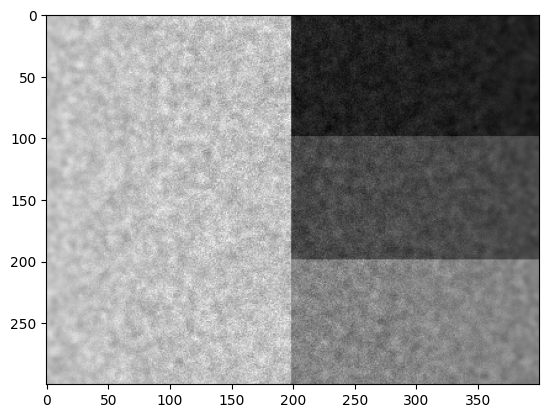

Layer 1 / 1


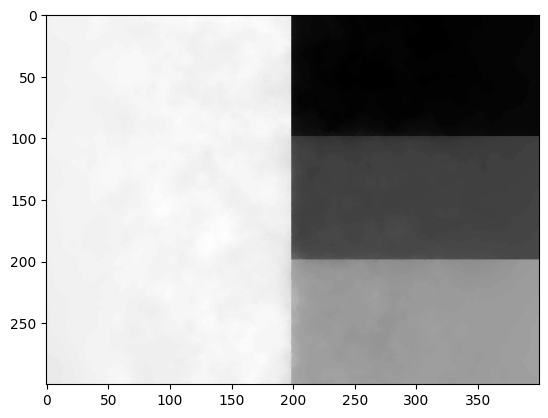

Layer 1 / 1


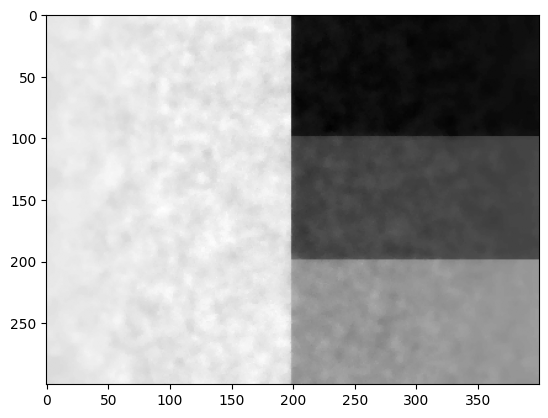

In [66]:
IMAGE_PATH = "../data/image.png"

image = load_image(IMAGE_PATH, gray=True, verbose=True)

decomposition_wls = wls(image, 0.35, 1.8, c=1, nb_layers=1, verbose=True)
decomposition_wls2 = wls(image, 0.25, 1.2, c=1, nb_layers=1, verbose=True)

[[187 187 187 ...  31  31  31]
 [189 187 189 ...  31  33  33]
 [189 190 190 ...  35  36  36]
 ...
 [183 184 186 ... 121 123 127]
 [184 184 186 ... 123 124 127]
 [186 184 184 ... 126 127 129]]


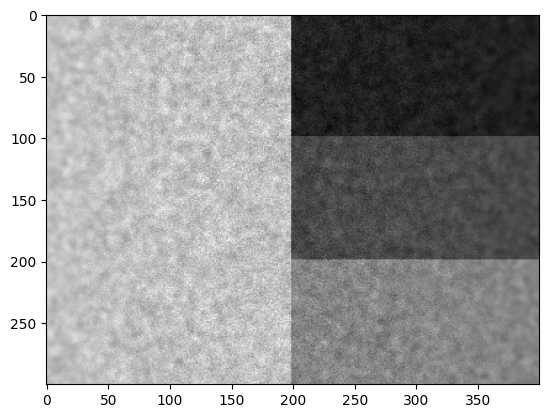

In [76]:
print(image)
decomposition_blf = cv2.bilateralFilter(image, d=9, sigmaColor=0.3, sigmaSpace=12)

plt.imshow(decomposition_blf, cmap='gray')
plt.show()